# Financial Data Preprocessing and Analysis

This notebook demonstrates Task 1: Preprocessing and exploring financial data for TSLA, BND, and SPY.

## Overview
- Load financial data (saved to data/raw/)
- Perform exploratory data analysis
- Clean and preprocess data (saved to data/processed/)
- Calculate risk metrics (VaR, Sharpe Ratio)
- Generate comprehensive reports

In [6]:
# Install requirements
import subprocess
import sys
import os

# Import required libraries
import warnings
warnings.filterwarnings('ignore')

# Add scripts directory to path and change to root directory
os.chdir('..')
sys.path.append('scripts')

from main_analysis import FinancialAnalysisPipeline

## 1. Initialize Analysis Pipeline

Set up the pipeline with TSLA, BND, and SPY for 5-year analysis.

In [7]:
# Initialize the financial analysis pipeline
symbols = ['TSLA', 'BND', 'SPY']
pipeline = FinancialAnalysisPipeline(
    symbols=symbols,
    period='5y',
    risk_free_rate=0.02
)

print(f"Initialized pipeline for symbols: {symbols}")
print(f"Analysis period: 5 years")
print(f"Risk-free rate: 2%")

Initialized pipeline for symbols: ['TSLA', 'BND', 'SPY']
Analysis period: 5 years
Risk-free rate: 2%


## 2. Load Data

Load financial data from Yahoo Finance (saved to data/raw/).

In [8]:
# Load raw data (automatically saved to data/raw/)
raw_data = pipeline.data_loader.load_data()
data_info = pipeline.data_loader.get_data_info()

print("\nData Information:")
for symbol, info in data_info.items():
    print(f"{symbol}: {info['records']} records, {info['date_range']}")
    print(f"  Saved to: {info['saved_to']}")
    print(f"  Missing values: {info['missing_values']}")

Loading financial data for 3 symbols...
✓ Saved TSLA data to data\raw\TSLA_5y.csv
✓ Loaded 1256 records for TSLA
✓ Saved BND data to data\raw\BND_5y.csv
✓ Loaded 1256 records for BND
✓ Saved SPY data to data\raw\SPY_5y.csv
✓ Loaded 1256 records for SPY

Data Information:
TSLA: 1256 records, 2020-08-10 to 2025-08-08
  Saved to: data/raw/TSLA_5y.csv
  Missing values: 0
BND: 1256 records, 2020-08-10 to 2025-08-08
  Saved to: data/raw/BND_5y.csv
  Missing values: 0
SPY: 1256 records, 2020-08-10 to 2025-08-08
  Saved to: data/raw/SPY_5y.csv
  Missing values: 0


## 3. Exploratory Data Analysis

Generate comprehensive visualizations of raw data.

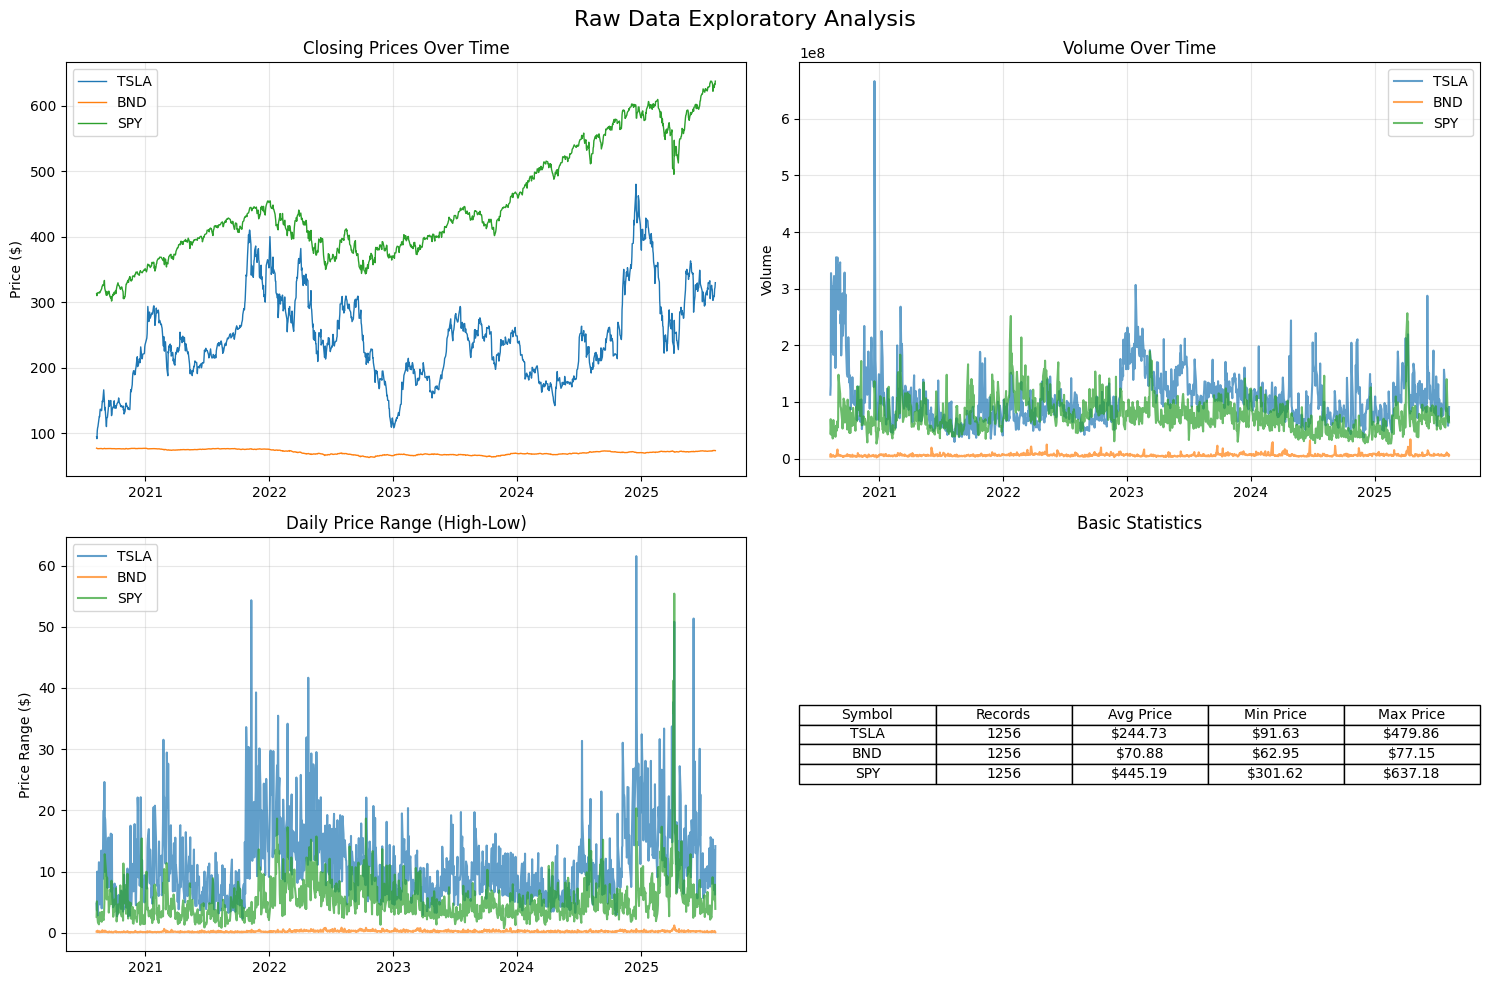

✓ EDA visualizations completed


In [9]:
# Create basic plots with raw data
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Raw Data Exploratory Analysis', fontsize=16)

# Price trends
for symbol, data in raw_data.items():
    axes[0, 0].plot(data.index, data['Close'], label=symbol, linewidth=1)
axes[0, 0].set_title('Closing Prices Over Time')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Volume trends
for symbol, data in raw_data.items():
    axes[0, 1].plot(data.index, data['Volume'], label=symbol, alpha=0.7)
axes[0, 1].set_title('Volume Over Time')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Price ranges (High-Low)
for symbol, data in raw_data.items():
    price_range = data['High'] - data['Low']
    axes[1, 0].plot(data.index, price_range, label=symbol, alpha=0.7)
axes[1, 0].set_title('Daily Price Range (High-Low)')
axes[1, 0].set_ylabel('Price Range ($)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Basic statistics table
stats_data = []
for symbol, data in raw_data.items():
    stats_data.append({
        'Symbol': symbol,
        'Records': len(data),
        'Avg Price': f"${data['Close'].mean():.2f}",
        'Min Price': f"${data['Close'].min():.2f}",
        'Max Price': f"${data['Close'].max():.2f}"
    })

stats_df = pd.DataFrame(stats_data)
axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=stats_df.values, colLabels=stats_df.columns, 
                        cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1, 1].set_title('Basic Statistics')

plt.tight_layout()
plt.show()

print("✓ EDA visualizations completed")

## 4. Data Preprocessing

Clean data and calculate returns (saved to data/processed/).

In [10]:
# Clean data and calculate returns (automatically saved to data/processed/)
cleaned_data = pipeline.preprocessor.clean_data(raw_data)
returns_data = pipeline.preprocessor.calculate_returns(cleaned_data)
statistics = pipeline.preprocessor.calculate_statistics()
outliers = pipeline.preprocessor.detect_outliers()

print("\n📁 Data Saved:")
print("Raw data: data/raw/")
print("Cleaned data: data/processed/")
print("Returns data: data/processed/")

Cleaning financial data...
✓ Saved cleaned TSLA data to data\processed\TSLA_cleaned.csv
✓ Cleaned data for TSLA: 1256 records
✓ Saved cleaned BND data to data\processed\BND_cleaned.csv
✓ Cleaned data for BND: 1256 records
✓ Saved cleaned SPY data to data\processed\SPY_cleaned.csv
✓ Cleaned data for SPY: 1256 records
Calculating daily returns...
✓ Saved TSLA returns to data\processed\TSLA_returns.csv
✓ Calculated 1255 return observations for TSLA
✓ Saved BND returns to data\processed\BND_returns.csv
✓ Calculated 1255 return observations for BND
✓ Saved SPY returns to data\processed\SPY_returns.csv
✓ Calculated 1255 return observations for SPY
Calculating statistical measures...
✓ Statistics calculated for TSLA
✓ Statistics calculated for BND
✓ Statistics calculated for SPY
Detecting outliers...
✓ TSLA: 18 Z-score outliers, 47 IQR outliers
✓ BND: 12 Z-score outliers, 33 IQR outliers
✓ SPY: 14 Z-score outliers, 57 IQR outliers

📁 Data Saved:
Raw data: data/raw/
Cleaned data: data/processe

## 5. Advanced Analysis

Perform statistical tests and volatility analysis on processed data.

Generating comprehensive visualizations...


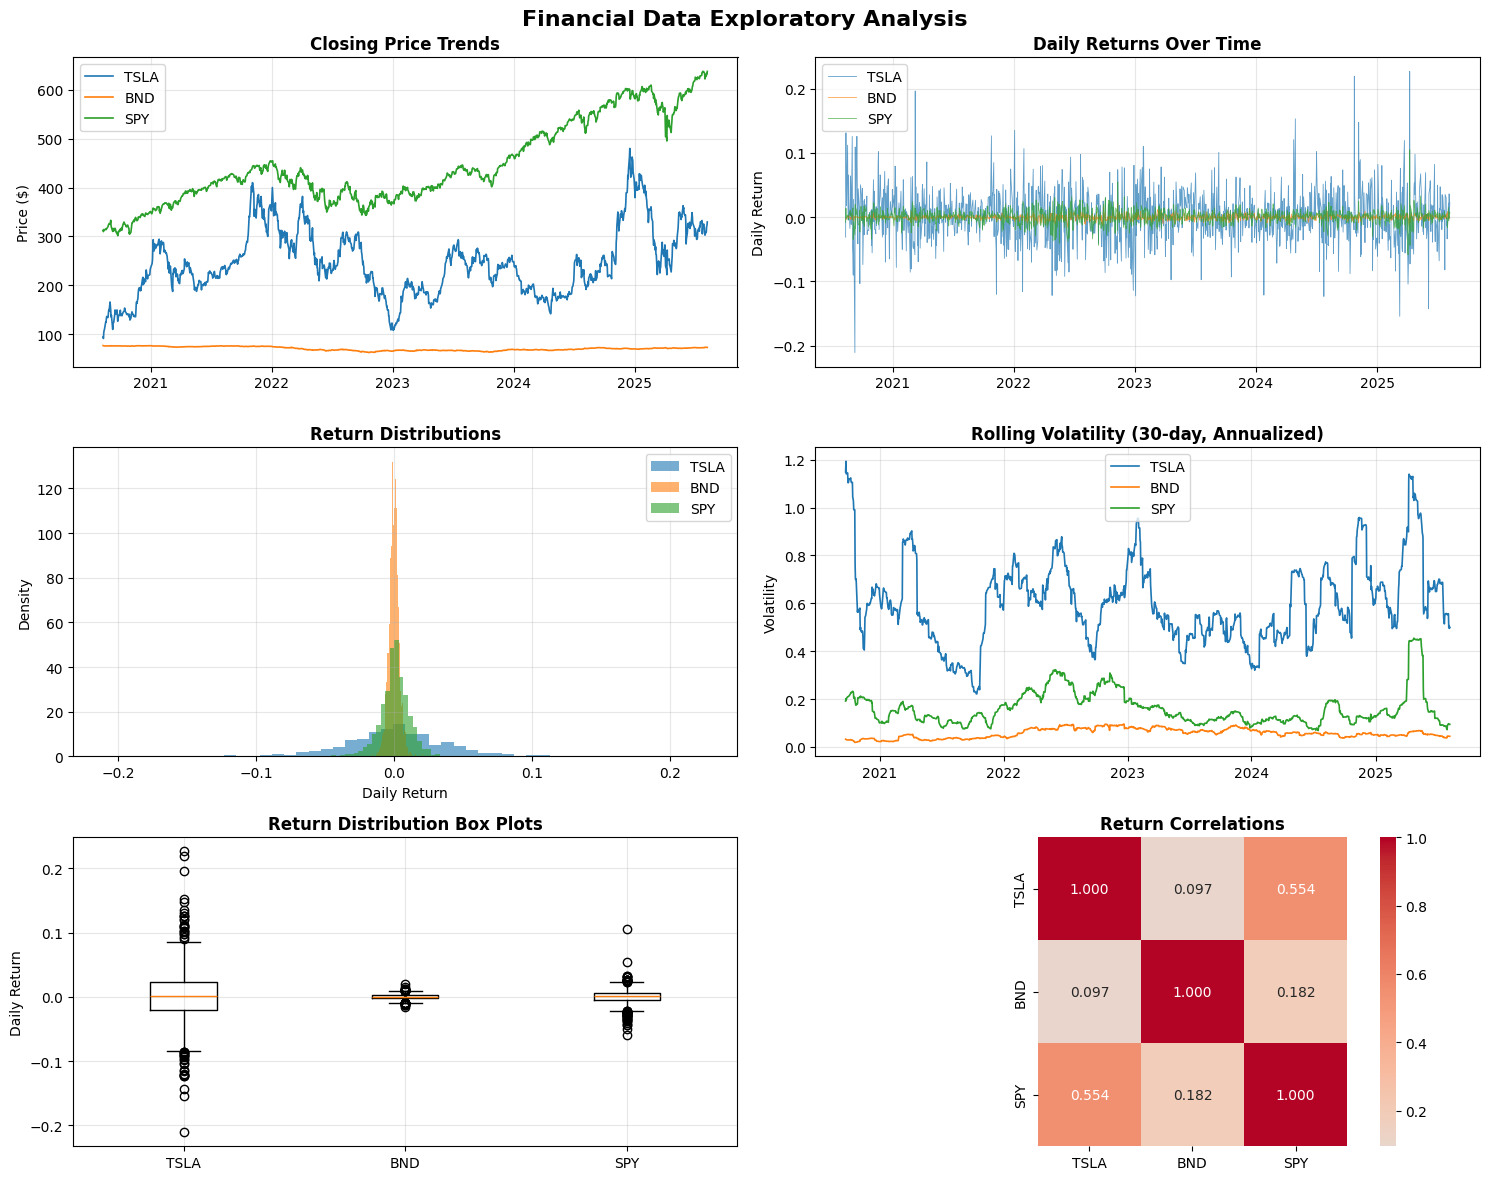

In [11]:
# Create comprehensive plots with processed data
pipeline.eda_analyzer.create_comprehensive_plots(cleaned_data, returns_data)

In [12]:
# Perform stationarity tests
adf_results = pipeline.eda_analyzer.perform_stationarity_tests(cleaned_data, returns_data)

Performing stationarity tests (ADF)...
✓ TSLA ADF Tests:
  Prices: Stationary (p=0.0395)
  Returns: Stationary (p=0.0000)
✓ BND ADF Tests:
  Prices: Non-stationary (p=0.5137)
  Returns: Stationary (p=0.0000)
✓ SPY ADF Tests:
  Prices: Non-stationary (p=0.9455)
  Returns: Stationary (p=0.0000)


In [13]:
# Analyze volatility patterns
volatility_analysis = pipeline.eda_analyzer.analyze_volatility_patterns(returns_data)

Analyzing volatility patterns...
✓ TSLA volatility analysis completed
✓ BND volatility analysis completed
✓ SPY volatility analysis completed


## 6. Risk Calculations

Calculate Value at Risk (VaR) and Sharpe Ratios for all symbols.

In [14]:
# Calculate VaR (95% confidence level)
var_results = pipeline.risk_calculator.calculate_var(returns_data, confidence_level=0.05)

Calculating VaR at 95.0% confidence level...
✓ TSLA VaR calculated:
  Historical: -0.0610 (-6.10%)
  Parametric: -0.0641 (-6.41%)
✓ BND VaR calculated:
  Historical: -0.0062 (-0.62%)
  Parametric: -0.0062 (-0.62%)
✓ SPY VaR calculated:
  Historical: -0.0171 (-1.71%)
  Parametric: -0.0175 (-1.75%)


In [15]:
# Calculate Sharpe Ratios and performance metrics
sharpe_results = pipeline.risk_calculator.calculate_sharpe_ratio(returns_data)

Calculating Sharpe Ratios (Risk-free rate: 2.0%)...
✓ TSLA Performance Metrics:
  Annual Return: 0.4521 (45.21%)
  Sharpe Ratio: 0.6793
  Max Drawdown: -0.7363 (-73.63%)
✓ BND Performance Metrics:
  Annual Return: -0.0081 (-0.81%)
  Sharpe Ratio: -0.4695
  Max Drawdown: -0.1822 (-18.22%)
✓ SPY Performance Metrics:
  Annual Return: 0.1584 (15.84%)
  Sharpe Ratio: 0.7899
  Max Drawdown: -0.2450 (-24.50%)


In [16]:
# Calculate portfolio metrics
portfolio_metrics = pipeline.risk_calculator.calculate_portfolio_metrics(returns_data)

Calculating portfolio-level metrics...
✓ Portfolio Metrics (Equal Weight):
  Annual Return: 0.2008 (20.08%)
  Sharpe Ratio: 0.7161


In [17]:
# Calculate beta coefficients
beta_results = pipeline.risk_calculator.calculate_beta(returns_data, market_symbol='SPY')

Calculating beta coefficients relative to SPY...
✓ TSLA Beta: 2.0122
✓ BND Beta: 0.0622


## 7. Generate Reports

Create comprehensive analysis reports and summaries.

In [18]:
# Generate comprehensive summary report
summary_report = pipeline.report_generator.generate_summary_report(
    symbols, statistics, var_results, sharpe_results, adf_results
)

print(summary_report)

Generating comprehensive summary report...
✓ Summary report generated
FINANCIAL DATA ANALYSIS SUMMARY REPORT
Generated on: 2025-08-09 15:21:43
Symbols Analyzed: TSLA, BND, SPY

PERFORMANCE SUMMARY
------------------------------
Symbol Annual Return Volatility Sharpe Ratio Max Drawdown
  TSLA        45.21%     63.61%        0.679      -73.63%
   BND        -0.81%      5.99%       -0.469      -18.22%
   SPY        15.84%     17.53%        0.790      -24.50%

RISK SUMMARY (95% VaR)
-------------------------
Symbol Historical VaR Parametric VaR
  TSLA         -6.10%         -6.41%
   BND         -0.62%         -0.62%
   SPY         -1.71%         -1.75%

KEY INSIGHTS
---------------
• Highest Volatility: TSLA (63.6%)
• Lowest Volatility: BND (6.0%)
• Best Performer: TSLA (45.2% annual return)
• Worst Performer: BND (-0.8% annual return)
• Best Risk-Adjusted Return: SPY (Sharpe: 0.790)

INVESTMENT RECOMMENDATIONS
------------------------------
• TSLA: High-risk, high-reward growth investmen

In [19]:
# Generate executive summary
executive_summary = pipeline.report_generator.create_executive_summary(symbols, sharpe_results)
print(executive_summary)

EXECUTIVE SUMMARY

Portfolio Analysis of 3 assets:
• Average Annual Return: 20.1%
• Average Volatility: 29.0%

Top Performer: TSLA (45.2% annual return)
Highest Risk: TSLA (63.6% volatility)


## 8. Key Results Summary

Display key metrics in a structured format.

In [20]:
import pandas as pd

# Create summary DataFrame for key metrics
summary_data = []
for symbol in symbols:
    if symbol in sharpe_results and symbol in var_results:
        summary_data.append({
            'Symbol': symbol,
            'Annual Return (%)': f"{sharpe_results[symbol]['annual_return']*100:.2f}",
            'Volatility (%)': f"{sharpe_results[symbol]['annual_volatility']*100:.2f}",
            'Sharpe Ratio': f"{sharpe_results[symbol]['sharpe_ratio']:.3f}",
            'Max Drawdown (%)': f"{sharpe_results[symbol]['max_drawdown']*100:.2f}",
            'VaR 95% (%)': f"{var_results[symbol]['historical_var']*100:.2f}",
            'Beta': f"{beta_results.get(symbol, 'N/A'):.3f}" if isinstance(beta_results.get(symbol), float) else 'N/A'
        })

summary_df = pd.DataFrame(summary_data)
print("\n📊 KEY PERFORMANCE METRICS")
print("=" * 50)
print(summary_df.to_string(index=False))


📊 KEY PERFORMANCE METRICS
Symbol Annual Return (%) Volatility (%) Sharpe Ratio Max Drawdown (%) VaR 95% (%)  Beta
  TSLA             45.21          63.61        0.679           -73.63       -6.10 2.012
   BND             -0.81           5.99       -0.469           -18.22       -0.62 0.062
   SPY             15.84          17.53        0.790           -24.50       -1.71 1.000


## 9. Investment Insights

Key takeaways from the analysis.

In [21]:
print("\n🎯 INVESTMENT INSIGHTS")
print("=" * 30)
print("• TSLA: High-risk, high-reward investment with significant volatility")
print("• BND: Low-risk, stable returns suitable for portfolio diversification")
print("• SPY: Moderate-risk market exposure with balanced risk-return profile")
print("\n📈 PORTFOLIO RECOMMENDATIONS")
print("=" * 35)
print("• Consider diversification across all three assets")
print("• TSLA for growth potential (small allocation due to high risk)")
print("• BND for stability and income generation")
print("• SPY for broad market exposure and moderate growth")


🎯 INVESTMENT INSIGHTS
• TSLA: High-risk, high-reward investment with significant volatility
• BND: Low-risk, stable returns suitable for portfolio diversification
• SPY: Moderate-risk market exposure with balanced risk-return profile

📈 PORTFOLIO RECOMMENDATIONS
• Consider diversification across all three assets
• TSLA for growth potential (small allocation due to high risk)
• BND for stability and income generation
• SPY for broad market exposure and moderate growth


## 10. Optional: Export Results

Uncomment to export detailed results to CSV files.

In [23]:
pipeline.report_generator.export_detailed_data(
    'financial_analysis_results',
    statistics=statistics,
    var_results=var_results,
    sharpe_results=sharpe_results,
    adf_results=adf_results
)

print("✅ Analysis completed successfully!")
print("All results are available in the variables above for further exploration.")

Exporting detailed data to financial_analysis_results_*.csv files...
✓ Exported statistics data
✓ Exported var_results data
✓ Exported sharpe_results data
✓ Exported adf_results data
✅ Analysis completed successfully!
All results are available in the variables above for further exploration.
